In [1]:
from deepface import DeepFace

# from deepface import VGGFace


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

if 'requirements.txt' not in os.listdir():
    os.chdir('../')
    base_dir = os.getcwd()

from src.get_photos import download_photo, download_all_photos

2025-02-21 14:38:03.398488: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-21 14:38:03.401248: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-21 14:38:03.409896: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-21 14:38:03.428210: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740159483.453613   34789 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740159483.46

In [2]:
car_path = "data/photos/face_photos_user_1/face_image_0.jpg"
car_path1 = "data/photos/face_photos_user_1/face_image_1.jpg"
cab_path = "data/photos/face_photos_user_003/face_image_0.jpg"
cab_path2 = "data/photos/face_photos_user_003/face_image_1.jpg"
cab_path3 = "data/photos/face_photos_user_2/face_image_0.jpg"
car_path_list = [car_path,car_path1]
cab_path_list = [cab_path,cab_path2,cab_path3]

In [3]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
  "GhostFaceNet"
]

In [4]:
def test_all_models(path_list_1, path_list_2,models,expected_result):
    df = pd.DataFrame(columns=['model','item_1','item_2','result','expected_result'])

    for model in models:
        for item in path_list_1:
            for item2 in path_list_2:
                
                result = DeepFace.verify(
                    img1_path = item,
                    img2_path = item2,
                )
                new_row = {
                    'model': model,
                    'item_1': (os.path.basename(item)), 
                    'item_2': (os.path.basename(item2)),
                    'result': result['verified'],
                    'expected_result':expected_result
                }
                df = pd.concat([df, pd.DataFrame(new_row, index=[0])], ignore_index=True)
        
    df['was_right'] = np.where((df['expected_result'] == df['result']), 1, 0)

    return df


def search_face(face_path,folder_path,model_name = "VGG-Face"):
    print('INITIAL IMAGE')
    img = mpimg.imread(face_path)
    imgplot = plt.imshow(img)
    plt.show()

    print('-----------------------------------')
    print('SIMILAR IMAGES')
    
    dfs = DeepFace.find(
    img_path = face_path,
    db_path = folder_path,
    model_name = model_name,
    threshold = 0.47
    )
    df = pd.DataFrame(dfs[0])


    for item in df['identity']:
        img = mpimg.imread(item)
        plt.imshow(img)
        plt.show()
    
    return df

In [22]:
# df = test_all_models(car_path_list,car_path_list,models,True)

# print(df.shape[0])
# df2 = test_all_models(cab_path_list,cab_path_list,models,True)
# df = pd.concat([df, df2], ignore_index=True)
# print(df2.shape[0])
# print(df.shape[0])

# df2 = test_all_models(car_path_list,cab_path_list,models,False)
# df = pd.concat([df, df2], ignore_index=True)
# print(df2.shape[0])
# print(df.shape[0])

# df = df.groupby('model')['was_right'].nunique()

# result = df.groupby(['model', 'was_right']).size().reset_index(name='count')
# result

face recognition

In [5]:
test_path = "data/images/test_images/5.jpg"
folder_path = "data/photos"

INITIAL IMAGE


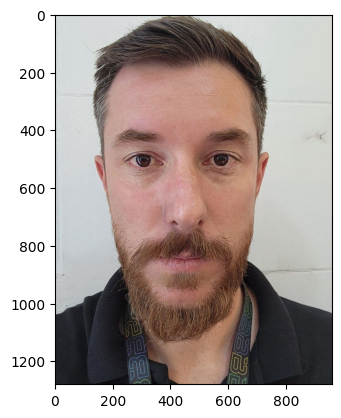

-----------------------------------
SIMILAR IMAGES
25-02-21 14:38:41 - Searching data/images/test_images/3.jpg in 812 length datastore


2025-02-21 14:38:42.217823: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


25-02-21 14:38:50 - find function duration 9.412508726119995 seconds


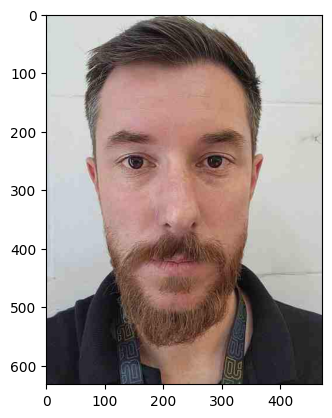

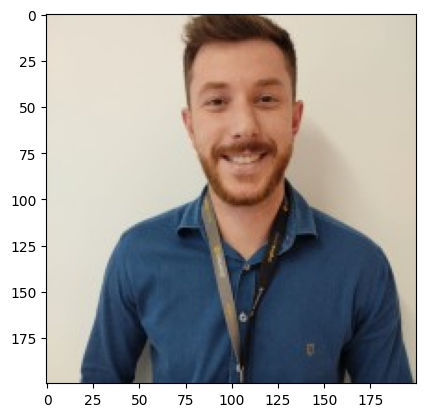

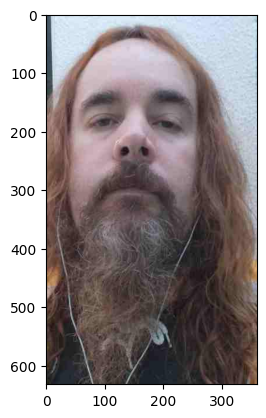

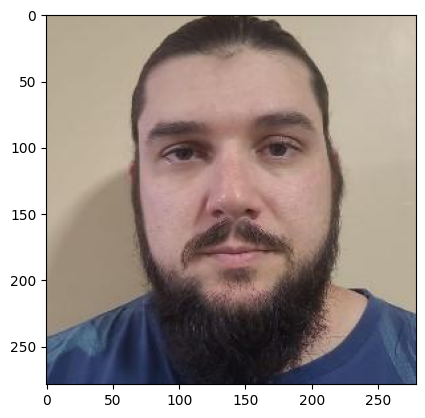

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,data/photos/face_photos_user_869982/face_image...,370c791c8f6294329d0804880dd3ab7f46727f34,15,90,413,413,21,171,831,831,0.47,0.030055
1,data/photos/face_photos_user_472927/face_image...,f68c889c46e4239894faf94b468a3571f99521ff,66,15,81,81,21,171,831,831,0.47,0.277546
2,data/photos/face_photos_user_117367/face_image...,c535a5d1d64991f64187235e9b92970788be8f6b,0,37,330,330,21,171,831,831,0.47,0.381347
3,data/photos/face_photos_user_144473/face_image...,906c92b4a8093033d8e04314bd5e325ca9e47147,39,21,199,199,21,171,831,831,0.47,0.441298


In [6]:
# model[1] teve bons resultados com peso de 0,4 a 0,47
# model[2] teve bons resultados com peso 0,45
# model[9] apresentou resultados médios
test_path = "data/images/test_images/3.jpg"

df = search_face(test_path, folder_path,model_name = models[1])

df